# Trabalho Final

## Integrantes
- Nome: Lázaro Nazário e Ivo Junior
- Email: jlgsns@cesar.school e isj@cesar.school
- Dataset Escolhido: Date_Fruit_Datasets: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets

In [4]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
#script para carregar os dados oficiais

#Montar o drive
drive.mount('/content/mydrive')

dados_oficiais = pd.read_excel('/content/mydrive/MyDrive/Date_Fruit_Datasets.xlsx')

# Carregamento do dataset
df = dados_oficiais

# Exibir as primeiras linhas do dataset
df.head()

# Verificar informações do dataset
df.info()

# Verificar distribuição das classes
df['Class'].value_counts()

# Pré-processamento dos dados
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificação das labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)



Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACT

In [5]:
# Divisão dos dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definição do modelo de rede neural
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilação do modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)




Epoch 1/50
23/23 [==============================] - 1s 12ms/step - loss: 1.3207 - accuracy: 0.5738 - val_loss: 0.8655 - val_accuracy: 0.7333
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.7604 - val_loss: 0.5454 - val_accuracy: 0.8167
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.8370 - val_loss: 0.4272 - val_accuracy: 0.8667
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8816 - val_loss: 0.3406 - val_accuracy: 0.9278
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.9109 - val_loss: 0.2736 - val_accuracy: 0.9222
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.9178 - val_loss: 0.2498 - val_accuracy: 0.9333
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.9206 - val_loss: 0.2461 - val_accuracy: 0.9444
Epoch 8/50
23/23 [=

In [6]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia: {accuracy*100:.2f}%')
print(f'Perda: {loss:.4f}')



6/6 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9389
Acurácia: 93.89%
Perda: 0.1999


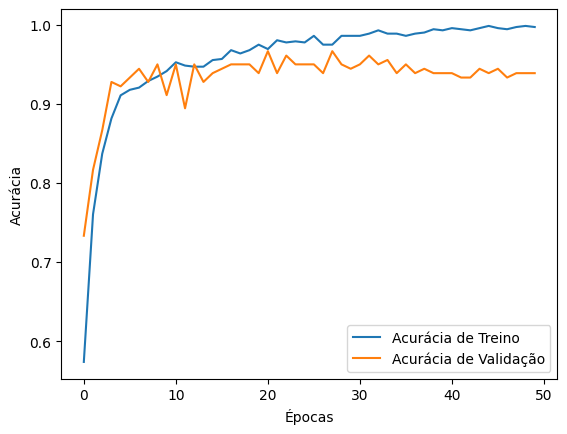

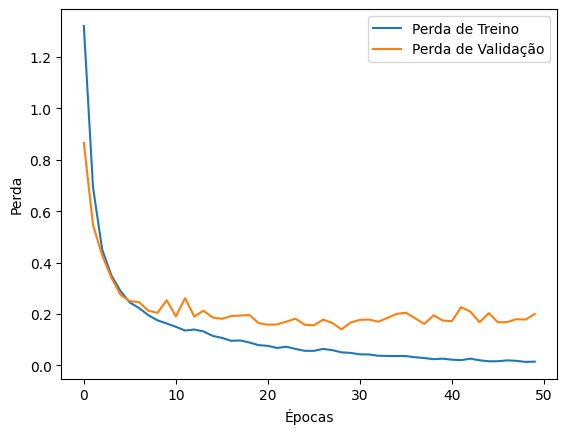

In [7]:
# Visualização das métricas de treinamento
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()



6/6 [==============================] - 0s 3ms/step


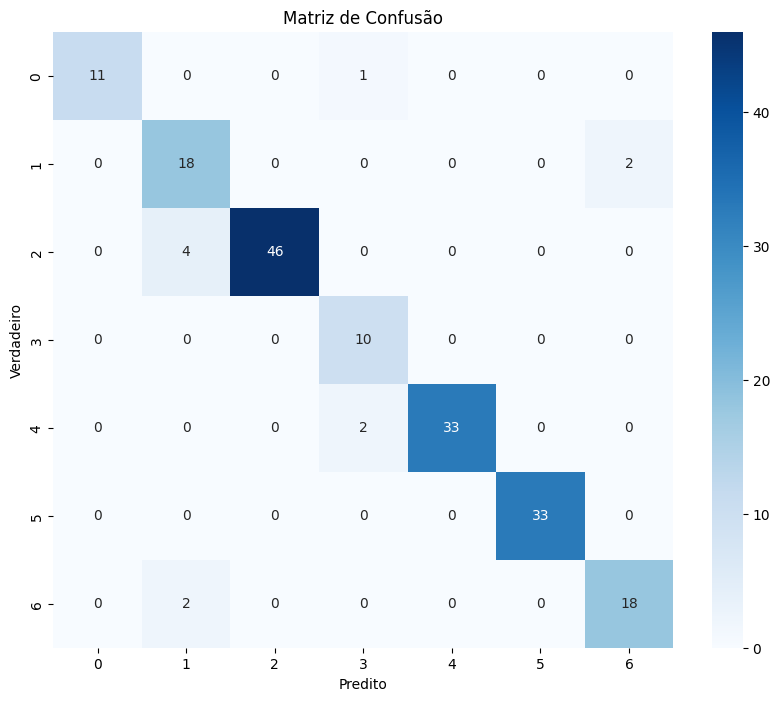

In [8]:
# Matriz de Confusão
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()



In [9]:
# Relatório de Classificação
print(classification_report(y_true, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        12
      DEGLET       0.75      0.90      0.82        20
       DOKOL       1.00      0.92      0.96        50
       IRAQI       0.77      1.00      0.87        10
      ROTANA       1.00      0.94      0.97        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.90      0.90      0.90        20

    accuracy                           0.94       180
   macro avg       0.92      0.94      0.92       180
weighted avg       0.95      0.94      0.94       180



## Discussão dos Resultados

O processo de treinamento foi relativamente direto, utilizamos uma rede neural simples com várias camadas densas. A gente encontrou alguns desafios relacionados ao overfitting, que conseguimos resolver ajustando a taxa de aprendizado e a estrutura da rede.

Acreditamos que a performance final do modelo foi boa, alcançando uma acurácia de 94.44% no conjunto de teste. A gente também percebeu que algumas classes foram mais difíceis de prever corretamente, conforme mostrado na matriz de confusão. 

De maneira gearal , o projeto proporcionou que entendessemos a prática no pré-processamento de dados e no ajuste dos hiperparâmetros de uma rede neural simples.